This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 

So according to the above statement, we need to classify the mushrooms in two categories - edible and poisonous.
This is hence, a binary classification problem i.e. with 2 results.

We can use classification models here.

In [289]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [290]:
#Loading the data using pandas read_csv method to create a dataframe

df = pd.read_csv('mushroom.csv')

In [291]:
#Having a look at the data

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [292]:
#Printing the list of columns available in the dataset
df.columns

#We conclude that class is the dependent variable (Target) here and rest are the independent variables

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [293]:
#Checking the unique values present in all columns

for i in df.columns:
    print(i, df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


From the data above, we see that the data is completely categorical in nature, and has no numerical values. The data is divided into different classes, denoted as alphabets. Hence we would need to encode values to perform operations.

We also observe that 'stalk-root' column has some missing values denoted by '?'

In [294]:
#The isnull command does not give any output as null, since empty values are represented by '?' and not NaN.

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [295]:
#Replacing '?' by 'NaN' to find out number of missing values

df.replace('?',np.NaN, inplace=True)

In [296]:
#Checking null values again

df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

We conclude that in stalk-root column, 2480 values out of 8124 is empty

Lets have a look at the data in stalk-root column

In [297]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Majority of the values in the column are 'b', so we can use this value to replace NaN values, but before this, we shall observe some more characteristics of this column and identify if the column is actually useful or would add noise to the data

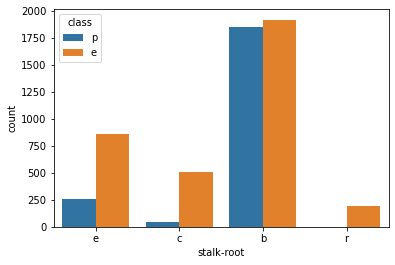

In [298]:
sns.countplot(data = df, x = df['stalk-root'], hue='class')

The value 'b' has similar distribution for edible and poisonous mushrooms, unlike other values. Filling the value with 'b' seems would make no impact, but we should check distribution of 'NaN'(pending) values between classes.
To do this, lets assign some random variable to NaN and plot.

In [299]:
#Making a new df to check NaN values distribution without actually impacting our dataset
df_try = df[['stalk-root','class']]

In [300]:
df_try.replace(np.NaN,'try',inplace=True)

In [301]:
df_try['stalk-root'].value_counts()

b      3776
try    2480
e      1120
c       556
r       192
Name: stalk-root, dtype: int64

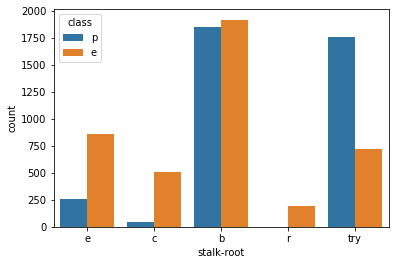

In [302]:
#Plotting the countplot again

sns.countplot(data = df_try, x = df_try['stalk-root'], hue='class')

From the above graph, we see that majority of values for which stalk-root is empty, are poisonous.
Filling the values with b would reduce model learning, since we would impact 'b' values.

So lets assign another category to missing variables.

In [303]:
df.replace(np.NaN,'empty',inplace=True)

Now lets check correlation of data. But to make a correlation, we need to encode values first.

Using label encoder now.

In [304]:
from sklearn.preprocessing import LabelEncoder

In [305]:
#Creating a new dataframe after encoding values 

le = LabelEncoder()
df_new = pd.DataFrame(columns = df.columns)
for i in df.columns:
    df_new[i] = le.fit_transform(df[i])

In [306]:
df_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [307]:
#Converting string data to float of plot heatmap

df_new = df_new.astype(float)

In [308]:
df_new.dtypes

class                       float64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [309]:
df_new.drop('veil-type', axis = 1, inplace = True)

Veil type is dropped because it only has 1 type of data, so we can reduce dimensionality here, so that it becomes easy for the model to learn.

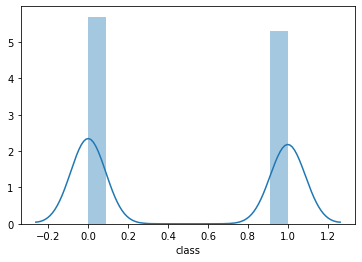

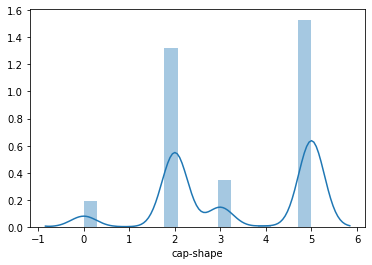

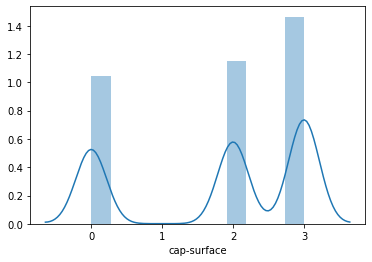

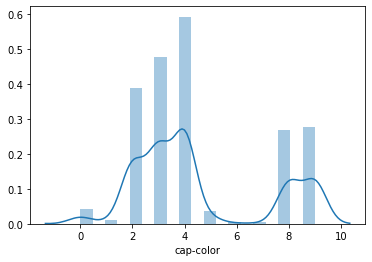

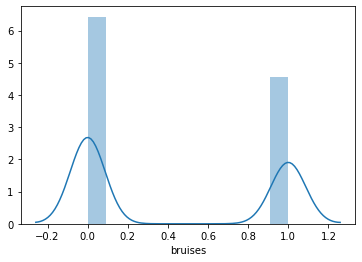

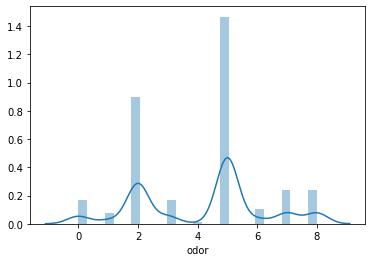

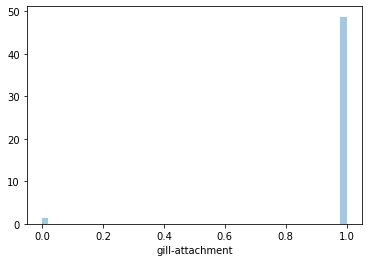

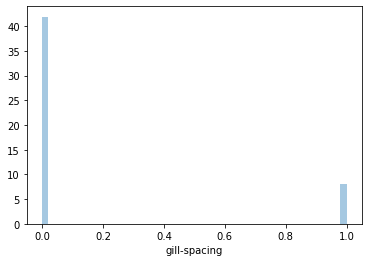

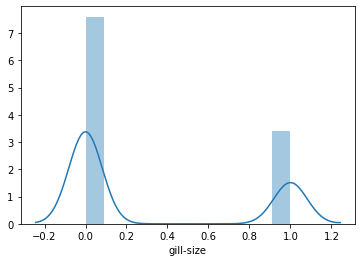

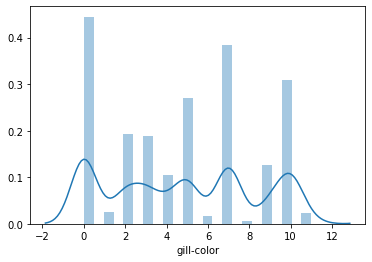

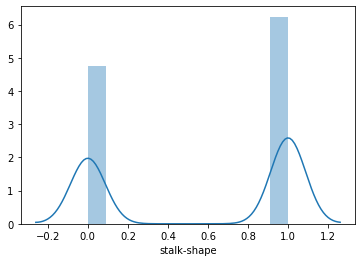

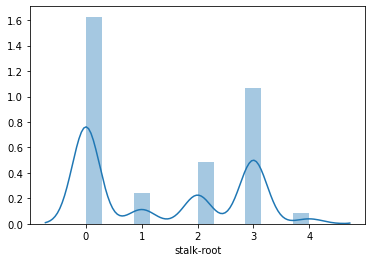

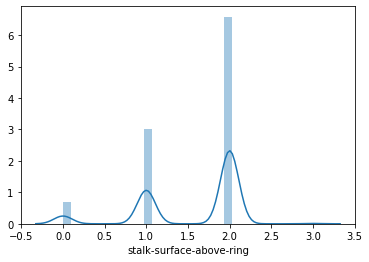

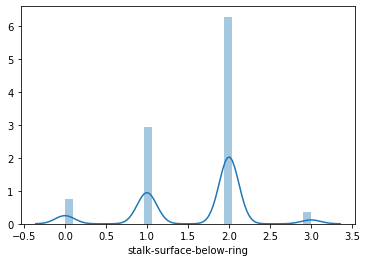

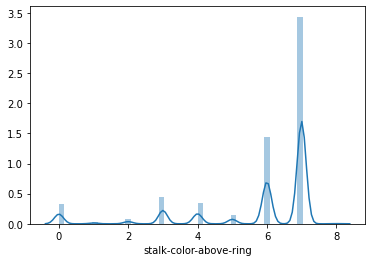

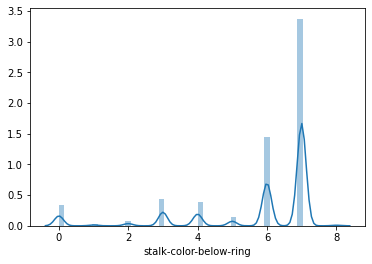

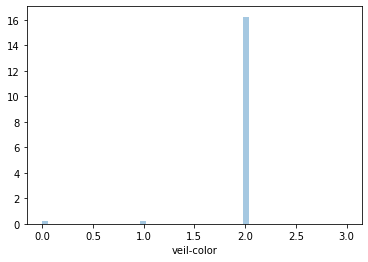

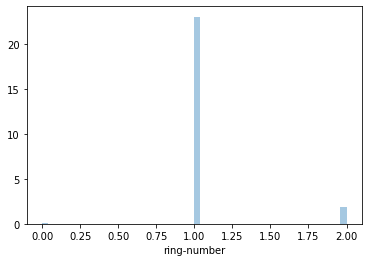

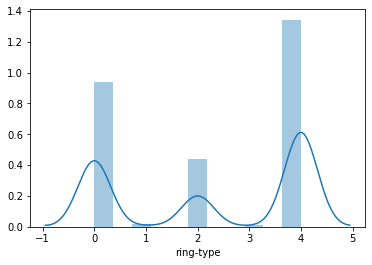

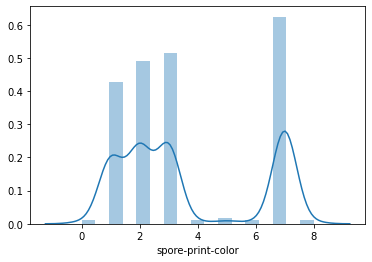

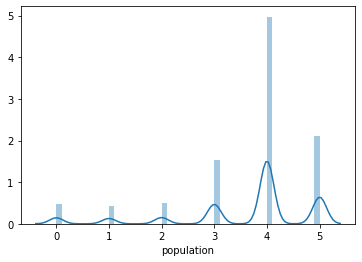

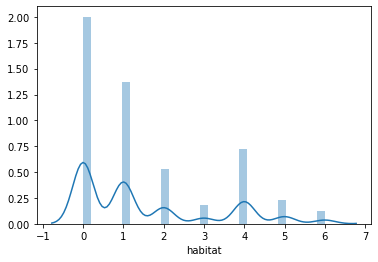

In [310]:
#Checking for distribution of data
for i in df_new.columns:
    plt.subplot()
    sns.distplot(df_new[i])
    plt.show()

From the above data we see that the gill-attachment, gill-spacing, veil-color, ring number have extremely unequal distribution.
Lets check the numbers once.

In [311]:
df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [312]:
df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [313]:
df['veil-color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

In [314]:
df['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

The above numbers confirm that the majority of the samples have similar gill-attachment, gill-spacing, veil-color and ring-number.

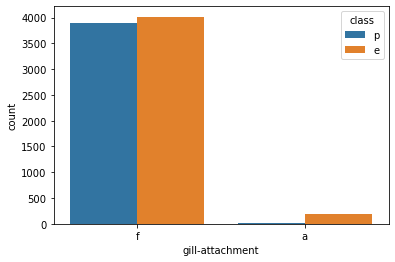

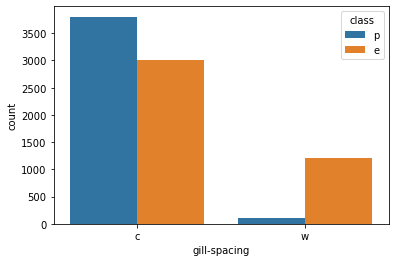

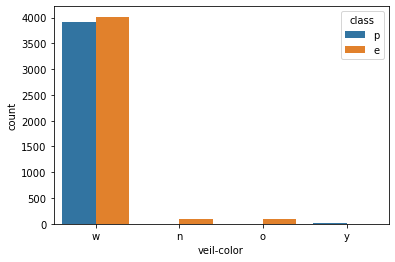

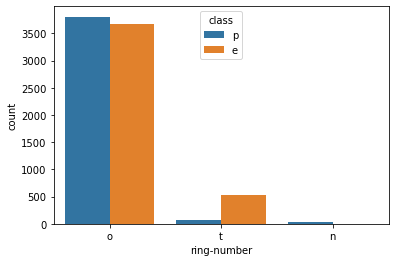

In [315]:
#Plotting a histogram to check data distribution affecting the class
for i in ['gill-attachment','gill-spacing','veil-color','ring-number']:
    plt.subplot()
    sns.countplot(df[i], hue = df['class'])
    plt.show()


Seems like the columns are not impacting the class of mushrooms quite much. In case we need to drop the columns, these can be dropped.
For now, keeping these columns to check how the model learns.

In [316]:
#Since we do not have any missing data in the dataset, lets try to check how our model learns without any more manipulation

#Importing ML libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [317]:
# Dividing dataset into x and y

x = df_new.drop('class', axis = 1)
y = df_new['class']

In [318]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,2.0,5.0,5.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,2.0,1.0,7.0,7.0,2.0,1.0,0.0,7.0,4.0,2.0


In [319]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

In [320]:
#Splitting the dataset into train and test part

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 121)

In [321]:
lg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 10)
gnb = GaussianNB()

In [322]:
#Checking shape of x_train
x_train.shape

(5686, 21)

In [323]:
#Checking shape of y_train
y_train.shape

(5686,)

In [324]:
for i in [lg, rfc, gnb]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print('Accuracy of ',i, accuracy_score(y_test, pred))
    print('Confusion matrix',i,confusion_matrix(y_test, pred))
    print('----------------------------------------------')

Accuracy of  LogisticRegression() 0.9569319114027892
Confusion matrix LogisticRegression() [[1226   38]
 [  67 1107]]
----------------------------------------------
Accuracy of  RandomForestClassifier(n_estimators=10) 1.0
Confusion matrix RandomForestClassifier(n_estimators=10) [[1264    0]
 [   0 1174]]
----------------------------------------------
Accuracy of  GaussianNB() 0.9273995077932732
Confusion matrix GaussianNB() [[1193   71]
 [ 106 1068]]
----------------------------------------------


The random forest classifier is giving the complete accuracy here. Might be a case of overfitting. Lets check that as well.

In [325]:
from sklearn.model_selection import cross_val_score

In [326]:
for i in [lg, rfc, gnb]:
    cvs = cross_val_score(i, x,y,cv=5)
    print('Cross val score for ',i,cvs)
    print('Mean accuracy :',cvs.mean())

Cross val score for  LogisticRegression() [0.68246154 0.98769231 0.87384615 0.99569231 0.7955665 ]
Mean accuracy : 0.8670517620310724
Cross val score for  RandomForestClassifier(n_estimators=10) [0.84246154 1.         0.99753846 1.         0.783867  ]
Mean accuracy : 0.9247733990147783
Cross val score for  GaussianNB() [0.66584615 0.928      0.8        0.67569231 0.49445813]
Mean accuracy : 0.7127993179234559


Trying to remove the extra columns and then checking how the model learns

In [327]:
lg_new = LogisticRegression()
rfc_new = RandomForestClassifier(n_estimators = 8)
gnb_new = GaussianNB()

In [328]:
x_new = df_new.drop(['class','gill-attachment','gill-spacing','veil-color','ring-number'], axis = 1)
y_new = df_new['class']

In [329]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new,test_size = 0.3, random_state = 121)

In [330]:
for i in [lg_new, rfc_new, gnb_new]:
    i.fit(x_train_new, y_train_new)
    pred = i.predict(x_test_new)
    print('Accuracy of ',i, accuracy_score(y_test_new, pred))
    print('Confusion matrix',i,confusion_matrix(y_test_new, pred))
    print('----------------------------------------------')

Accuracy of  LogisticRegression() 0.9273995077932732
Confusion matrix LogisticRegression() [[1189   75]
 [ 102 1072]]
----------------------------------------------
Accuracy of  RandomForestClassifier(n_estimators=8) 1.0
Confusion matrix RandomForestClassifier(n_estimators=8) [[1264    0]
 [   0 1174]]
----------------------------------------------
Accuracy of  GaussianNB() 0.8933552091878589
Confusion matrix GaussianNB() [[1183   81]
 [ 179  995]]
----------------------------------------------


In [331]:
for i in [lg_new, rfc_new, gnb_new]:
    cvs = cross_val_score(i, x_new,y_new,cv=5)
    print('Cross val score for ',i,cvs)
    print('Mean accuracy :',cvs.mean())

Cross val score for  LogisticRegression() [0.65415385 0.89292308 0.81784615 0.96       0.7770936 ]
Mean accuracy : 0.820403334596438
Cross val score for  RandomForestClassifier(n_estimators=8) [0.84246154 1.         0.99507692 1.         0.83497537]
Mean accuracy : 0.9345027661993178
Cross val score for  GaussianNB() [0.71630769 0.80061538 0.79323077 0.99569231 0.55972906]
Mean accuracy : 0.7731150435771126


In [332]:
#Getting almost similar scores. Keeping the model as it is. Using Random Forest Classifier for predictions.
#Creating an object for the model using joblib

import joblib

In [333]:
joblib.dump(rfc, 'mushroom_clsf.obj')

['mushroom_clsf.obj']

In [334]:
try_check = joblib.load('mushroom_clsf.obj')

In [335]:
result = try_check.predict(x_test)

In [336]:
print('Accuracy', accuracy_score(y_test, result))
print('Confusion matrix',confusion_matrix(y_test, result))

Accuracy 1.0
Confusion matrix [[1264    0]
 [   0 1174]]
